<a href="https://colab.research.google.com/github/mohitphulsunge/DataScience-MachineLearning/blob/main/Visualization_Assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
import json

url = 'https://api.covid19india.org/states_daily.json'
urllib.request.urlretrieve(url, "data.json")
sns.set(color_codes=True)

In [ ]:
covid_data = pd.read_json("data.json")

with open("data.json") as f:
    data = json.load(f)
data = data["states_daily"]
covid_data = pd.json_normalize(data)
covid_data.date = pd.to_datetime(covid_data.date)
confirmed_cases_df = covid_data[
           covid_data["status"] == "Confirmed"
]
confirmed_cases_df.drop(["status", "dateymd"], axis=1, inplace=True)
confirmed_cases_df.set_index("date", inplace=True)
confirmed_cases_df = confirmed_cases_df.apply(pd.to_numeric)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##Styling Tabulation

In [ ]:
#For every cell
def color_red_negative(x):
    color = "red" if x < 0 else "white"
    return "color: " + color

#For every column
def bold_max_value(x):
    is_max = (x == x.max())
    return ["font-weight : bold" if y else "" for y in is_max]
confirmed_cases_df.tail(6).style.applymap(color_red_negative)
confirmed_cases_df.tail(6).style.highlight_max(color = "red").highlight_min(color = "green")
#Bold max value in a column and color the max value across row as red
confirmed_cases_df.tail(6).style.apply(bold_max_value).highlight_max(color = "red", axis=1)
#gradient_color, column wise
confirmed_cases_df.tail(6).style.background_gradient(cmap='Reds', subset=["mh", "tn", "ka"])
#Draw bars, per column
confirmed_cases_df.tail(6).style.bar(subset=["mh", "tn", "ka"])
#Different color
confirmed_cases_df.tail(6).style.bar(subset=["mh"], color="red").bar(subset=["tn"], color="orange")

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-07-19 00:00:00,6,1628,506,1797,54,4,316,0,36,6,99,24,125,30,64,123,1291,9931,7,12,6017,387,774,12,336,62,1648,53,42,33,257,746,1971,286,29420,0,37,34,666
2021-07-20 00:00:00,2,2498,476,1798,82,14,189,0,44,8,132,29,102,36,33,88,1464,16848,14,16,9389,500,1127,19,806,94,2085,68,78,22,147,657,1904,488,42128,0,69,50,752
2021-07-21 00:00:00,3,2527,418,1547,88,7,188,0,62,7,131,28,67,35,46,144,1639,17481,4,1,8159,558,1327,15,725,105,1927,66,112,22,251,691,1891,457,41687,0,52,37,869
2021-07-22 00:00:00,4,1843,486,1796,61,2,217,0,49,4,97,34,115,25,22,84,1653,12818,2,7,7302,513,928,17,625,81,1948,69,68,25,294,648,1872,253,34863,0,52,56,793
2021-07-23 00:00:00,0,1747,480,1621,85,1,118,0,58,6,73,36,87,39,39,63,1705,17518,5,10,6753,558,1284,11,847,92,1917,68,98,33,257,643,1830,509,39501,0,57,11,842
2021-07-24 00:00:00,0,2174,515,1595,75,5,156,0,66,7,144,39,130,13,33,88,1857,18531,7,17,6269,693,1198,6,653,124,1864,83,126,27,225,647,1819,299,40286,0,38,33,730


#Data Distribution (Continous Variable): Histogram

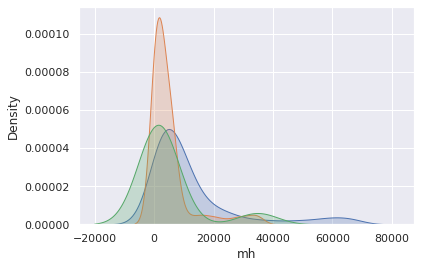

In [ ]:
#sns.distplot(confirmed_cases_df["mh"]);
#To hide the curve
#sns.distplot(confirmed_cases_df["mh"], kde=False);
#Get lines where the value is present
#sns.distplot(confirmed_cases_df["mh"], kde=False, rug=True);
#For kde plot
sns.kdeplot(confirmed_cases_df["mh"], shade=True)
sns.kdeplot(confirmed_cases_df["tn"], shade=True)
sns.kdeplot(confirmed_cases_df["ka"].sample(10), shade=True)

#Data Distribution (Continous Variable): Box Plot


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


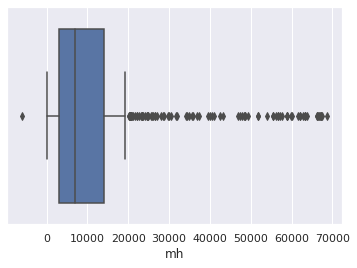

In [ ]:
#Box plot with whiskers at 1.5 times IQR by default
#sns.boxplot(confirmed_cases_df["mh"])
#Decrese whiskers value
sns.boxplot(confirmed_cases_df["mh"], whis=0.5)

#Data Distribution (Discrete Variable): Bar plot


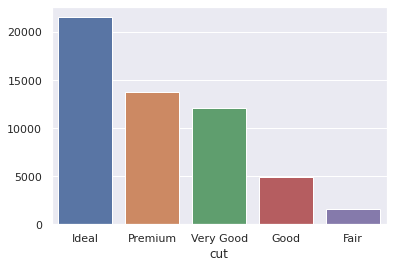

In [ ]:
diamond_df = sns.load_dataset("diamonds")
table = diamond_df.groupby("cut")["cut"].count()
sns.barplot(x=table.index, y=table.values)

#Data distribution Joint variable: Joint Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


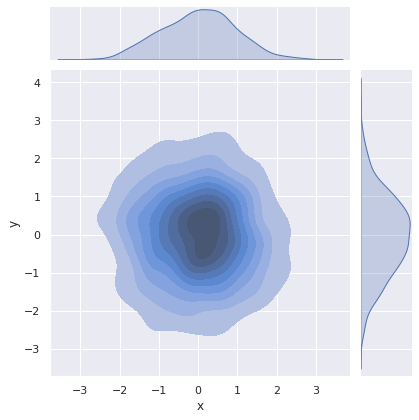

In [ ]:
#No relation between x and y. Points are scattered everywhere. No specific realtion between x and y. Also max points are near 0
x = np.random.normal(size=1000)
y = np.random.normal(size=1000)
df = pd.DataFrame({'x':x, 'y':y})
# # sns.jointplot('x', 'y', data=df)
# #To see kde curve
sns.jointplot('x', 'y', data=df, kind='kde', fill=True)

#Relation between x and y. Kde will give an error as correlation is 1
# x = np.random.normal(size=1000)
# y = x*2
# df = pd.DataFrame({'x':x, 'y':y})
# sns.jointplot('x', 'y', data=df, kind="kde")

#One Continous vs One discrete variable relation : Swarm Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


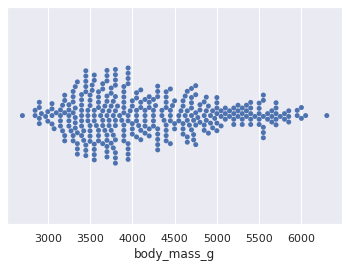

In [ ]:
#One continous variable and one discrete
# penguin = sns.load_dataset("penguins")
# sns.swarmplot(x="species", y="body_mass_g", data=penguin) #Gentoo species has overall high body mass
#Continous variables
sns.swarmplot(penguin.body_mass_g) #doesn't tell the granular details of which species is contributing to large body mass



#Voilin Plot: Plot for getting kde plot like shape and also Box plot information (Single continous variable)

[(2000.0, 7500.0)]

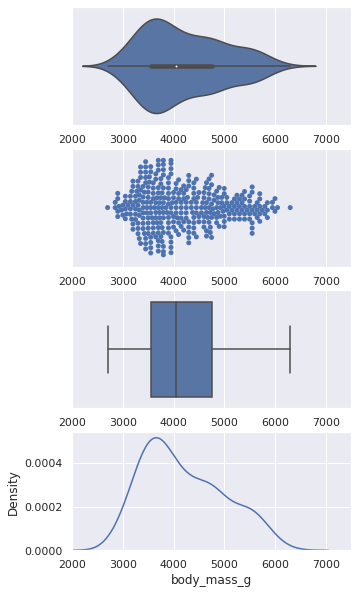

In [ ]:
#sns.violinplot(x="body_mass_g", data=penguin) #Colored region corresponds to kde plot, white point is the median and Black line is Box Plot Info
fig, axs = plt.subplots(nrows=4)
fig.set_size_inches(5, 10)
p1 = sns.violinplot(x="body_mass_g", data=penguin, ax=axs[0])
p1.set(xlim=(2000, 7500))
p2 = sns.swarmplot(x="body_mass_g", data=penguin, ax=axs[1])
p2.set(xlim=(2000, 7500))
p3 = sns.boxplot(x="body_mass_g", data=penguin, ax=axs[2])
p3.set(xlim=(2000, 7500))
p4 = sns.kdeplot(x="body_mass_g", data=penguin, ax=axs[3])
p4.set(xlim=(2000, 7500))

#Multiple Violon plots with discrete variable along x axis

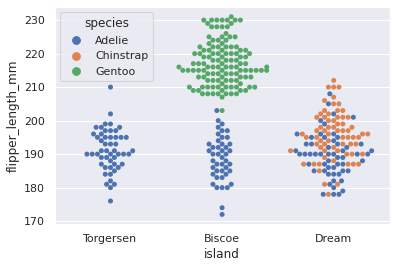

In [ ]:
#Tells that Gentoo Species has more body_mass
#sns.violinplot(x="species", y="body_mass_g", data=penguin)
#Biscoe island has two modes. This may be due to having multiple speicies at that island
# sns.violinplot(x="island", y="flipper_length_mm", data=penguin)
#data is somewhat detached. Maybe there are 2 speicies. use hue to ans the ques
#sns.swarmplot(x="island", y="flipper_length_mm", data=penguin)
#Our guess was correct. The island has 2 speicies in large number. 
sns.swarmplot(x="island", y="flipper_length_mm", hue="species" ,data=penguin)

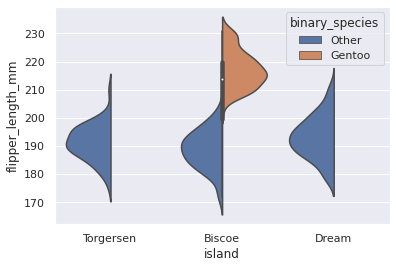

In [ ]:
#This will split the violin plot to have gender info. Split can be applied when categories are 2 only.
#sns.violinplot(x="island", y="flipper_length_mm", hue="sex", split=True ,data=penguin)
#Violin plot is drawn for each island for each species.
#sns.violinplot(x="island", y="flipper_length_mm", hue="species" ,data=penguin)
#One idea is to split the dataset such that we want Gentoo vs Adelie || Chinstrap
penguin["binary_species"] = penguin.species.apply(lambda x : "Gentoo" if x == "Gentoo" else "Other")
sns.violinplot(x="island", y="flipper_length_mm", hue="binary_species", split=True ,data=penguin)

#Faceted plotting


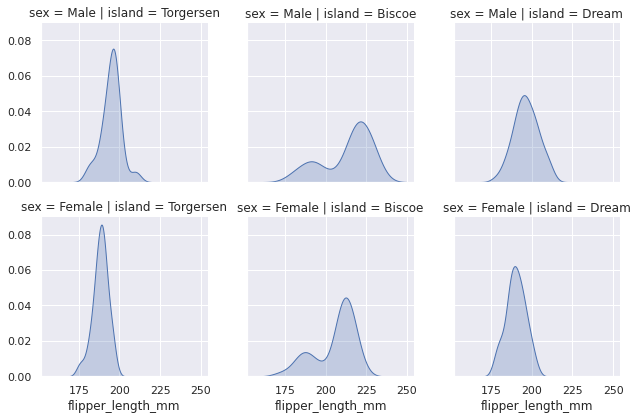

In [ ]:
g = sns.FacetGrid(penguin, col="island", row="sex")
g.map(sns.kdeplot,"flipper_length_mm", shade=True )

##Pair plot : Draws jointplot for every combination of variable

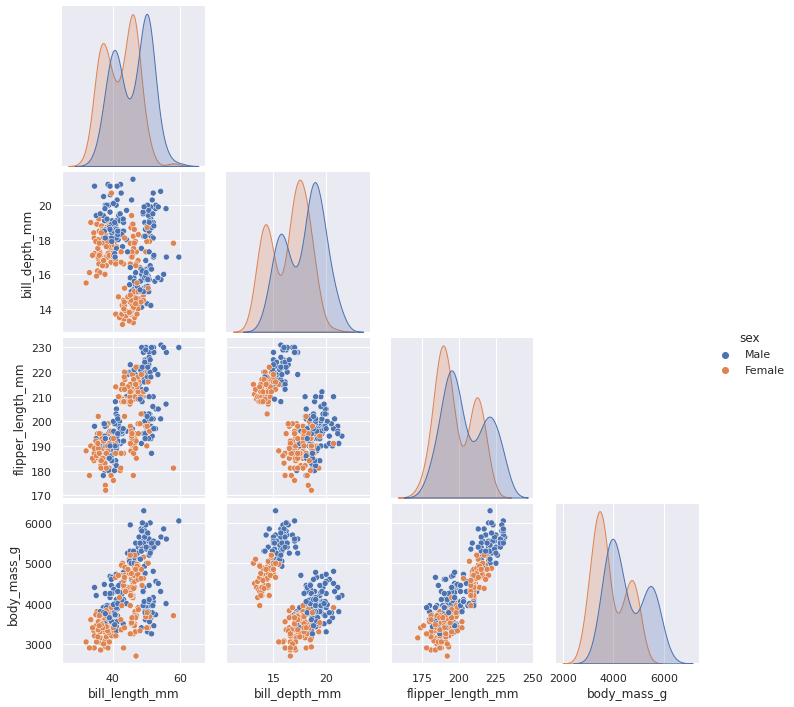

In [ ]:
#sns.pairplot(penguin)
#With one discrete varible
#sns.pairplot(penguin, hue="sex")
#To remove redundant info
sns.pairplot(penguin, hue="sex", corner=True)

##Boxen Plot :  More informative than Box plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


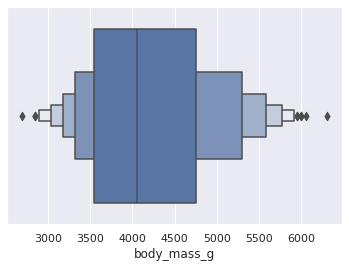

In [ ]:
sns.boxenplot(penguin["body_mass_g"])